In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns
from pathlib import Path
import math
import warnings
warnings.filterwarnings('ignore')

## Data Exploration
## Loading Data 
Read the Iowa data file into a Pandas DataFrame called `home_data`.

In [2]:
# Path of the file to read
iowa_file = '/Users/mgpel/OneDrive/Autumn_Falls/home_train.csv'

# Fill in the line below to read the file into a variable home_data
home_data = pd.read_csv(iowa_file)


## Review The Data

In [3]:
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Number of missing data
print("Missing data (train):")
print(home_data.isnull().sum().sort_values(ascending=False).head(20))

Missing data (train):
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64


## Data Exploration
## Removal of columns missing too much data

In [5]:
#delete columns containing too much missing data.
home_data.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

#filling missing values in columns like Fireplace, Garage, Basement with 'None' or 0.
none_fill = ['FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for col in none_fill:
    home_data[col] = home_data[col].fillna('None')

zero_fill = ['GarageYrBlt', 'MasVnrArea']
for col in zero_fill:
    home_data[col] = home_data[col].fillna(0)

# LotFrontage: fill in with the average from the same neighborhood
home_data['LotFrontage'] = home_data.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median()))

# Electrical:fill with the most common value
home_data['Electrical'] = home_data['Electrical'].fillna(home_data['Electrical'].mode()[0])

In [6]:
categorical_na_columns = [
    'LotFrontage','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 'MasVnrArea', 'Electrical', 'GarageYrBlt'
]
for col in categorical_na_columns:
    home_data[col] = home_data[col].fillna('None')

In [7]:
home_data.isnull().sum().sort_values(ascending=False).head()

Id             0
HalfBath       0
FireplaceQu    0
Fireplaces     0
Functional     0
dtype: int64

In [8]:
# Print summary statistics in next line
home_data.LotArea.describe().round()


count      1460.0
mean      10517.0
std        9981.0
min        1300.0
25%        7554.0
50%        9478.0
75%       11602.0
max      215245.0
Name: LotArea, dtype: float64

In [9]:
home_data[['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','LowQualFinSF',
            'GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch',
            '3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   OverallQual    1460 non-null   int64
 3   OverallCond    1460 non-null   int64
 4   YearBuilt      1460 non-null   int64
 5   YearRemodAdd   1460 non-null   int64
 6   1stFlrSF       1460 non-null   int64
 7   2ndFlrSF       1460 non-null   int64
 8   LowQualFinSF   1460 non-null   int64
 9   GrLivArea      1460 non-null   int64
 10  FullBath       1460 non-null   int64
 11  HalfBath       1460 non-null   int64
 12  BedroomAbvGr   1460 non-null   int64
 13  KitchenAbvGr   1460 non-null   int64
 14  TotRmsAbvGrd   1460 non-null   int64
 15  Fireplaces     1460 non-null   int64
 16  WoodDeckSF     1460 non-null   int64
 17  OpenPorchSF    1460 non-null   int64
 18  EnclosedPorch  1460 non-null   int64
 19  3SsnPo

In [10]:
# Calculate the correlations between the numerical variables
corr = home_data.corr(numeric_only=True)

#Top 10 variables with highest correlation of SalePrice.
top_corr_features = corr['SalePrice'].sort_values(ascending=False).head(11)
print(top_corr_features)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


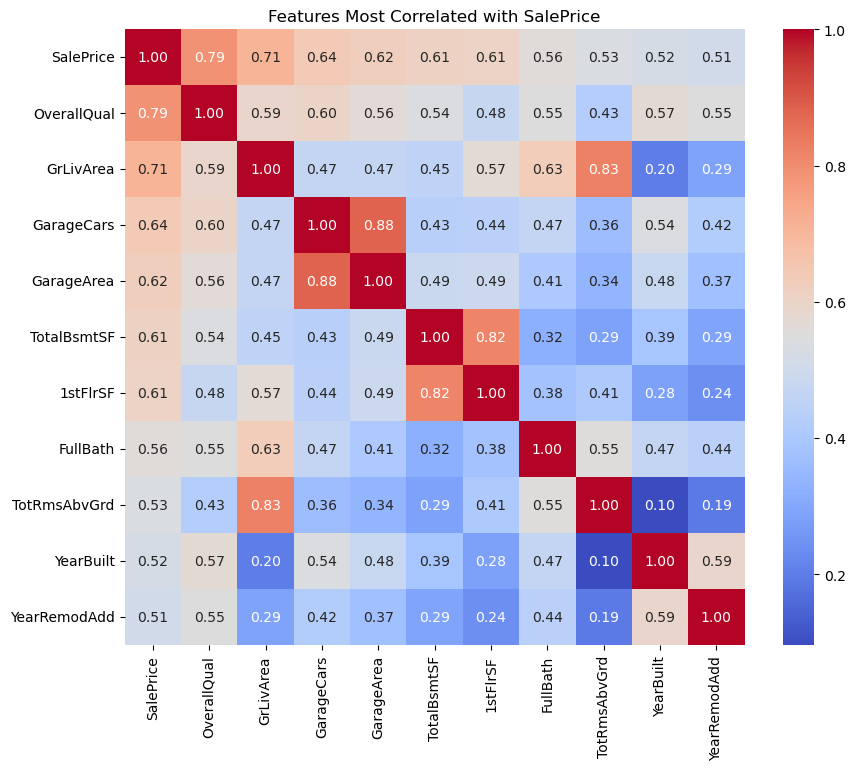

In [11]:
top_corr = home_data[top_corr_features.index]
plt.figure(figsize=(10,8))
sns.heatmap(top_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Features Most Correlated with SalePrice")
plt.show()

In [12]:
# What is the average lot size (rounded to nearest integer)?
avg_lot_size = 10517
# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_age = abs(home_data.YearBuilt.max()-2025)

In [13]:
print(f'The average lot size : {avg_lot_size} sq ft')
print(f'Age of newest home: {newest_home_age} years old')

The average lot size : 10517 sq ft
Age of newest home: 15 years old


## Think About the Data¶
The newest house in your data isn't that new. A few potential explanations for this:

They haven't built new houses where this data was collected.

The data was collected a long time ago. 

Houses built after the data publication wouldn't show up.

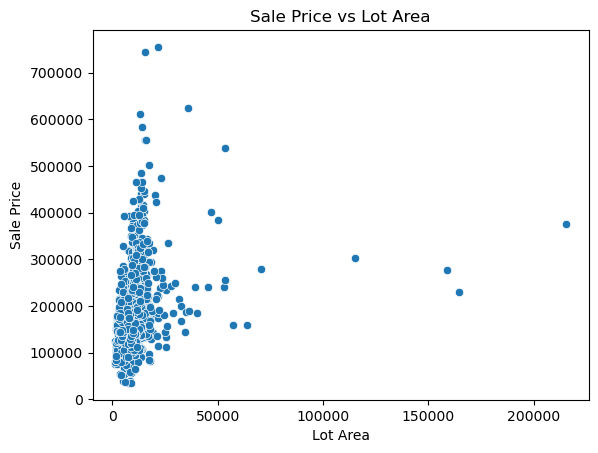

In [14]:
sns.scatterplot(data=home_data, x='LotArea', y='SalePrice')

plt.title('Sale Price vs Lot Area')
plt.xlabel('Lot Area')
plt.ylabel('Sale Price')
plt.show()

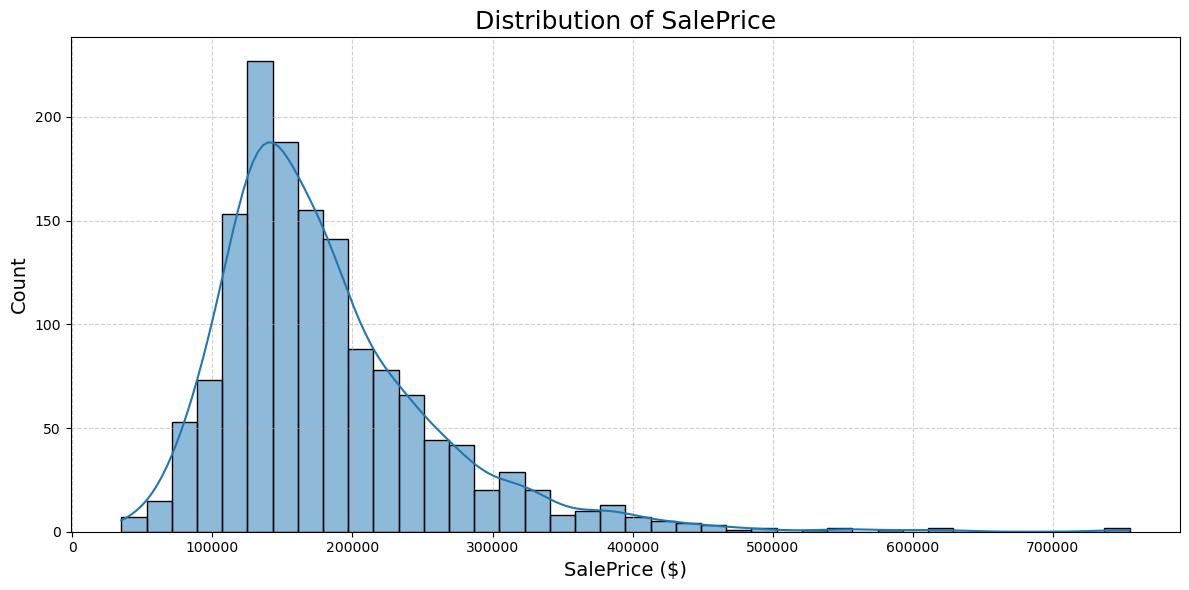

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(home_data['SalePrice'], bins=40, kde=True, color='#1f77b4')  # mavi ton
plt.title('Distribution of SalePrice', fontsize=18)
plt.xlabel('SalePrice ($)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## BUILDING MACHINE LEARNING MODEL

## Specify Prediction Target

In [16]:
# Create target object and call it y
y = home_data.SalePrice

## Create X
Create a DataFrame called X holding the predictive features.

In [17]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
# Create the list of features below
feature_names =['MSSubClass','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold']
# Select data corresponding to features in feature_names
X = home_data[feature_names]

# Fit logistic regression model
X = sm.add_constant(X)  # Adding a constant for the intercept
y = home_data['SalePrice'] # Target variable
X = pd.get_dummies(X)
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.4, random_state=1)

## Review Data
Before building a model, take a quick look at **X** to verify it looks sensible

In [18]:
X

,const,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1.0,60,8450,7,5,2003,2003,856,854,0,...,0,0,61,0,0,0,0,0,2,2008
1,1.0,20,9600,6,8,1976,1976,1262,0,0,...,1,298,0,0,0,0,0,0,5,2007
2,1.0,60,11250,7,5,2001,2002,920,866,0,...,1,0,42,0,0,0,0,0,9,2008
3,1.0,70,9550,7,5,1915,1970,961,756,0,...,1,0,35,272,0,0,0,0,2,2006
4,1.0,60,14260,8,5,2000,2000,1145,1053,0,...,1,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.0,60,7917,6,5,1999,2000,953,694,0,...,1,0,40,0,0,0,0,0,8,2007
1456,1.0,20,13175,6,6,1978,1988,2073,0,0,...,2,349,0,0,0,0,0,0,2,2010
1457,1.0,70,9042,7,9,1941,2006,1188,1152,0,...,2,0,60,0,0,0,0,2500,5,2010
1458,1.0,20,9717,5,6,1950,1996,1078,0,0,...,0,366,0,112,0,0,0,0,4,2010


## Specify and Fit Model
Create `DecisionTreeRegressor` and saved as iowa_model. 

Fit the model created using the data in `X` and `y` 

In [19]:
from sklearn.tree import DecisionTreeRegressor
#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model= DecisionTreeRegressor(random_state=1)

# Fit the model
iowa_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

## Make Predictions
Make predictions with the model's `predict` command using `X` as the data. Save the results to a variable called `predictions`.

In [20]:
predictions = iowa_model.predict(X)
print('First in-sample predictions:\n', predictions[:10])
print("Actual target values for those homes:\n", y.head(10).tolist())

First in-sample predictions:
 [208500. 181500. 223500. 140000. 250000. 143000. 307000. 200000. 129900.
 118000.]
Actual target values for those homes:
 [208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000]


## Split the Data
`train_test_split` function to split data.

In [21]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state=1)

## Step 2: Specify and Fit the Model

Create a `DecisionTreeRegressor` model and fit it to the relevant data.
Set `random_state` to 1 again when creating the model.

In [22]:
# Specify the model
iowa_model = DecisionTreeRegressor(random_state=1)
# Fit iowa_model with the training data.
iowa_model.fit(train_X, train_y)

DecisionTreeRegressor(random_state=1)

## Make Predictions with Validation data

In [23]:
# Predict with all validation observations
val_predictions = iowa_model.predict(val_X)

In [24]:
print('Validation Predictions: ', val_predictions[:10])

Validation Predictions:  [192500. 146500. 125500.  75000. 136500. 261500. 336000. 144152. 215000.
 175900.]


In [25]:
print('Actual Prices: ', y.head(10).to_list())

Actual Prices:  [208500, 181500, 223500, 140000, 250000, 143000, 307000, 200000, 129900, 118000]


Why is validation prediction different from the in-sample predictions.

Validation predictions differ from training (in-sample) predictions:
Model sees the training data, but not the validation data
During .fit(), the model learns patterns from the training data (X_train, y_train).

So when predicting on training data (model.predict(X_train)), the model is usually very accurate, sometimes even overly confident.

But when predicting on validation data (X_valid), the model is tested on unseen data — and performance naturally drops.

## Calculate the Mean Absolute Error in Validation Data

In [26]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_y, val_predictions)

# validation data mean absolut error
print(f'Validation Mean Absolute Error: $ {val_mae:.0f} \nIs this Mean Absolute Error good,\ncould it be better???' )


Validation Mean Absolute Error: $ 24649 
Is this Mean Absolute Error good,
could it be better???


In [27]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

## Compare Different Tree Sizes
**Write a loop that tries the following values for *max_leaf_nodes* from a set of possible values.**

**Call the `get_mae` function for each value of `max_leaf_nodes` and store the results to determine which value yields the most accurate model, as measured by the lowest mean absolute error (MAE).**


In [28]:
best_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
# compare MAE with differing values of max_leaf_nodes
scores = {leaf_size: get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in best_leaf_nodes}

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size =  min(scores, key=scores.get)

In [29]:
best_tree_size

250

## Step 2: Fit Model Using All Data
You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate by using all of the data and keeping that tree size.  No need to hold out the validation data now that you've made all your modeling decisions.

In [30]:
# Fit the model with best_tree_size. Fill in argument to make optimal size
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

# fit the final model
final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=250, random_state=1)

## Use a Random Forest

## Decision trees leave a difficult decision of underfitting and overfitting. `Random forest` uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. 

In [31]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

# fit your model
rf_model.fit(train_X, train_y)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_predictions = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_val_predictions, val_y)

print(f"Validation MAE for Random Forest Model: $ {rf_val_mae:.0f}")

Validation MAE for Random Forest Model: $ 17519


## DATA ANALYSIS 
## Decision Tree Regressor Validation MAE: $ 24649 

## Random Forest Regressor Validation MAE: $ 17882
## when comparing actual sales to predicted sales
Recommendation: Use random forest regressor for predictions on the sale of homes from the Iowa data set.

In [32]:
rec = abs(val_mae-rf_val_mae)
print(f'Validation MAE reduced by: {rec:.0f}')

Validation MAE reduced by: 7130


In [33]:
percentage_reduction = ((val_mae - rf_val_mae) / val_mae) * 100
print(f"Percentage reduction: {percentage_reduction:.2f}%")

Percentage reduction: 28.93%
